In [1]:
import pandas, warnings

import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

plt.style.use("seaborn-whitegrid")

from statsmodels.tools.sm_exceptions import ValueWarning

warnings.simplefilter('ignore', ValueWarning)

In [2]:
tanggal = ["Month"]

origin = pandas.read_table("/content/airline.csv", sep=",", parse_dates=tanggal)

In [3]:
origin = origin.sort_values("Month")

origin = origin.set_index("Month")

origin.columns = ["Monthly"]

origin.iloc[:5]

,Monthly
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [4]:
origin.tail()

,Monthly
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [5]:
origin.isnull().sum().sum()

0

In [6]:
total_data = len(origin)

total_data

144

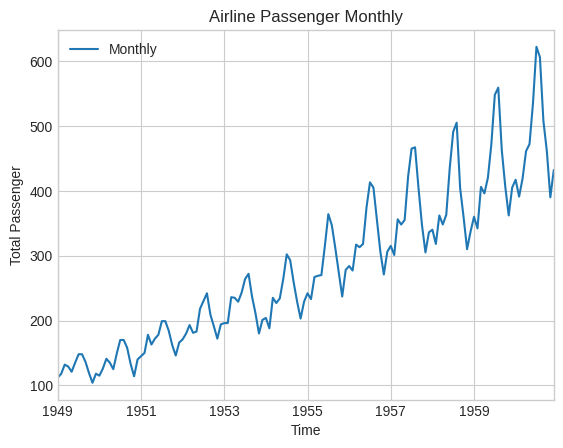

In [7]:
title = "Airline Passenger Monthly"

xlabel = "Time"

ylabel = "Total Passenger"

origin.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

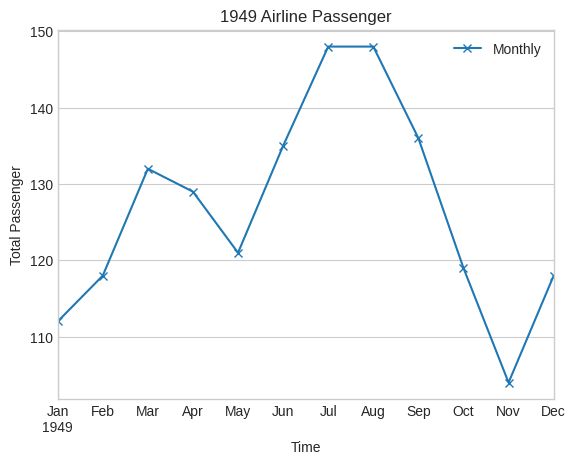

In [8]:
title = "1949 Airline Passenger"

xlabel = "Time"

ylabel = "Total Passenger"

origin["1949-01-01":"1949-12-01"].plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x");

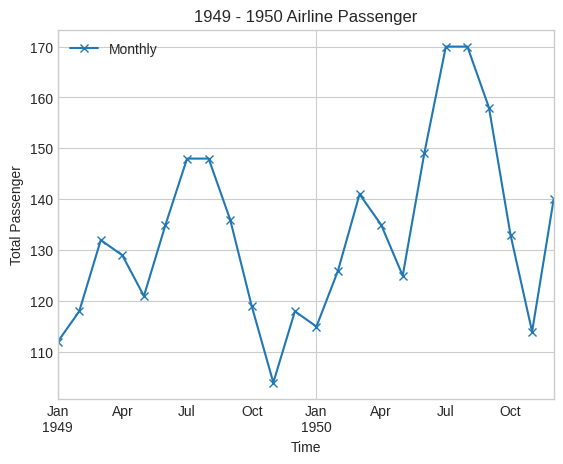

In [9]:
title = "1949 - 1950 Airline Passenger"

xlabel = "Time"

ylabel = "Total Passenger"

origin["1949-01-01":"1950-12-01"].plot.line(title=title, xlabel=xlabel, ylabel=ylabel, marker="x");

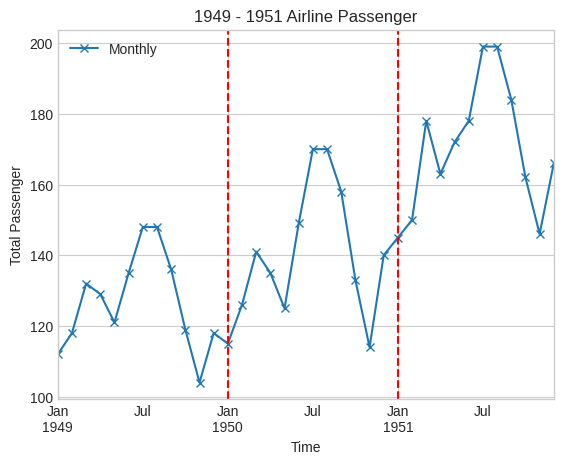

In [10]:
title = "1949 - 1951 Airline Passenger"

xlabel = "Time"

ylabel = "Total Passenger"

ax = origin["1949-01-01":"1951-12-01"].plot.line(title=title, marker="x")

ax.set_ylabel(ylabel)

ax.set_xlabel(xlabel)

for line in ["1950-01-01", "1951-01-01"]:

  ax.axvline(line, color="r", linestyle="--");

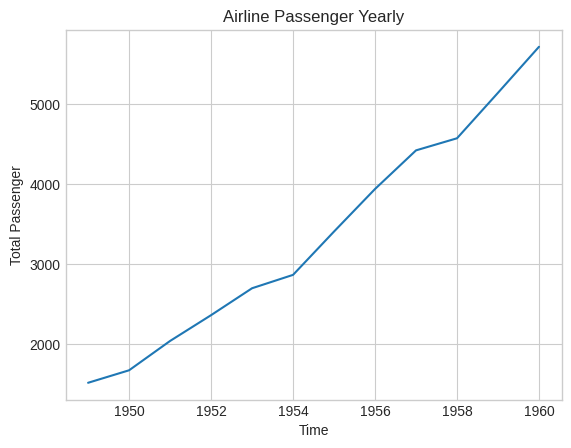

In [11]:
total = origin.groupby(origin.index.year)["Monthly"].sum()

title = "Airline Passenger Yearly"

total.plot.line(title=title, xlabel=xlabel, ylabel=ylabel);

### ```Statistical Test```

In [12]:
from statsmodels.tsa.stattools import adfuller

tester = adfuller(origin)

result_p = tester[1]

result_p

0.991880243437641

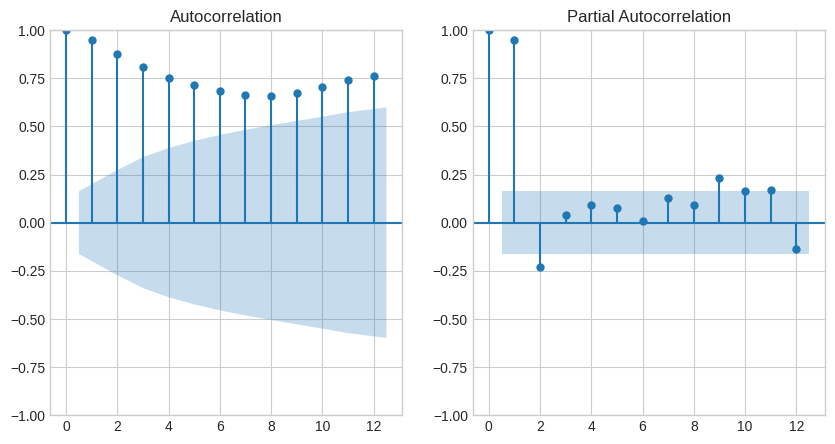

In [13]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

cate, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_acf(origin, lags=12, ax=axes[0])

plot_pacf(origin, lags=12, ax=axes[1]);

In [14]:
sample = origin["Monthly"].diff().dropna()

tester = adfuller(sample)

result_p = tester[1]

result_p

0.05421329028382478

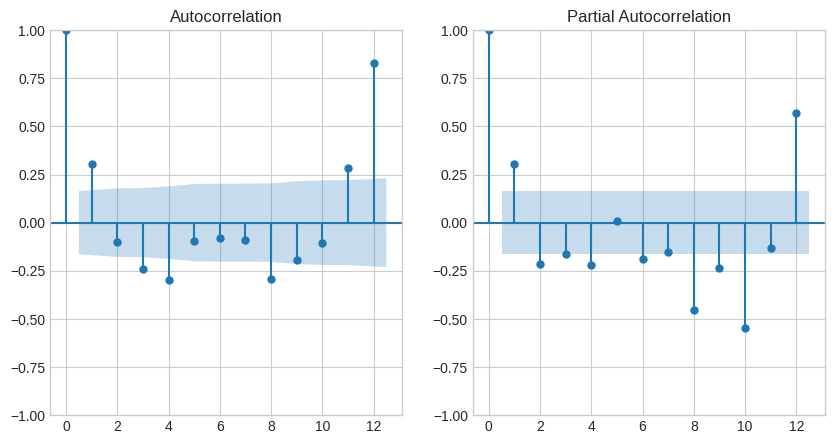

In [15]:
cate, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_acf(sample, lags=12, ax=axes[0])

plot_pacf(sample, lags=12, ax=axes[1]);

In [16]:
sample = origin["Monthly"].diff(2).dropna()

tester = adfuller(sample)

result_p = tester[1]

result_p

0.03862975767698902

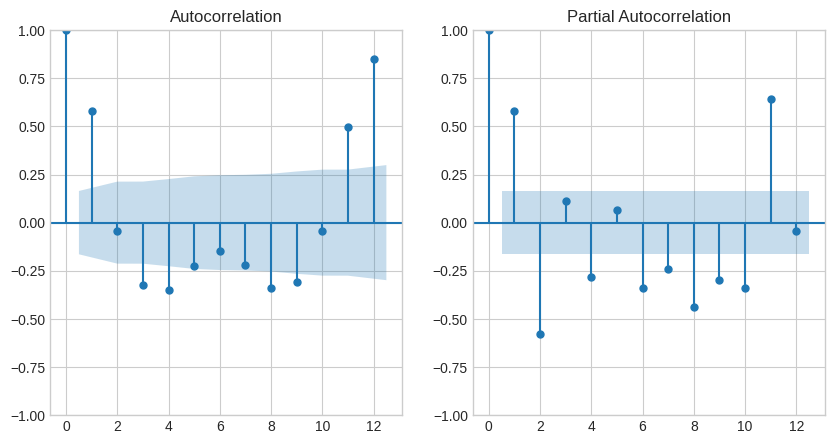

In [17]:
cate, axes = plt.subplots(1, 2, figsize=(10, 5))

plot_acf(sample, lags=12, ax=axes[0])

plot_pacf(sample, lags=12, ax=axes[1]);

### ```Train Split```

In [18]:
origin.iloc[:5]

,Monthly
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [19]:
train_split = 0.95

train = int(total_data * train_split)

train_split = origin.iloc[:train]

len(train_split)

136

In [20]:
train_split.tail()

,Monthly
Month,
1959-12-01,405
1960-01-01,417
1960-02-01,391
1960-03-01,419
1960-04-01,461


In [21]:
test_split = origin.iloc[train:]

len(test_split)

8

In [22]:
test_split.iloc[:5]

,Monthly
Month,
1960-05-01,472
1960-06-01,535
1960-07-01,622
1960-08-01,606
1960-09-01,508


In [23]:
test_split.tail()

,Monthly
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


### ```Model 1```

In [24]:
import numpy as np

from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error

model = ARIMA(train_split, order=(2, 1, 1)).fit()

logits = model.forecast(len(test_split))

errors = np.sqrt(mean_squared_error(test_split, logits))

In [25]:
errors

96.86227632989689

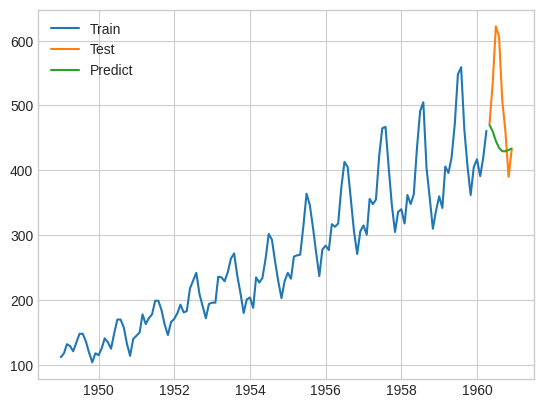

In [26]:
plt.plot(train_split, label="Train")

plt.plot(test_split, label="Test")

plt.plot(logits, label="Predict")

plt.legend()

plt.show()

In [27]:
model = ARIMA(train_split, order=(1, 1, 1)).fit()

logits = model.forecast(len(test_split))

errors = np.sqrt(mean_squared_error(test_split, logits))

In [28]:
errors

82.99637227408097

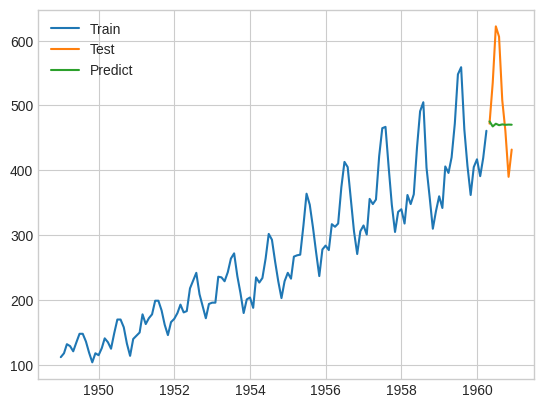

In [29]:
plt.plot(train_split, label="Train")

plt.plot(test_split, label="Test")

plt.plot(logits, label="Predict")

plt.legend()

plt.show()

### ```Model II```

In [ ]:
seasonal = ARIMA(train_split, order=(2, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

logits = seasonal.forecast(len(test_split))

errors = np.sqrt(mean_squared_error(test_split, logits))

In [31]:
errors

13.115718474952326

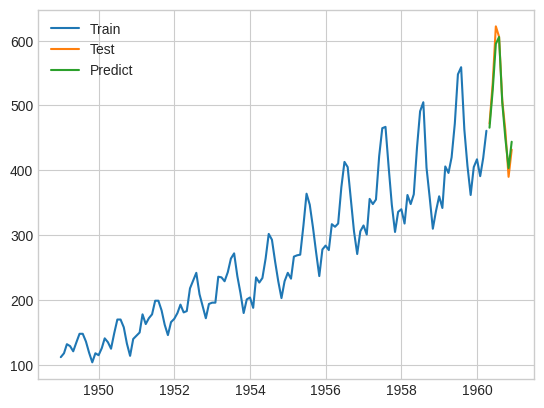

In [32]:
plt.plot(train_split, label="Train")

plt.plot(test_split, label="Test")

plt.plot(logits, label="Predict")

plt.legend()

plt.show()

In [33]:
seasonal = ARIMA(train_split, order=(1, 1, 1), seasonal_order=(1, 1, 1, 12)).fit()

logits = seasonal.forecast(len(test_split))

errors = np.sqrt(mean_squared_error(test_split, logits))

In [34]:
errors

16.032389644853094

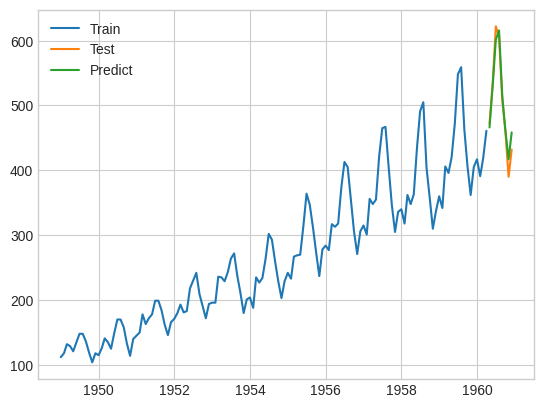

In [35]:
plt.plot(train_split, label="Train")

plt.plot(test_split, label="Test")

plt.plot(logits, label="Predict")

plt.legend()

plt.show()

### ```Model III```

In [36]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

exponent_model = ExponentialSmoothing(train_split, seasonal_periods=12, trend="mul", seasonal="mul").fit()

logits = exponent_model.forecast(len(test_split))

errors = np.sqrt(mean_squared_error(test_split, logits))

errors

12.123989966567098

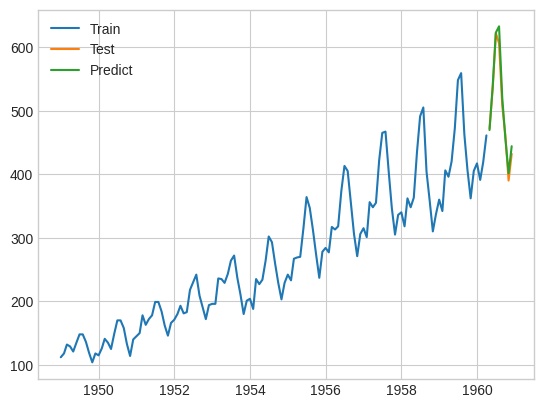

In [37]:
plt.plot(train_split, label="Train")

plt.plot(test_split, label="Test")

plt.plot(logits, label="Predict")

plt.legend()

plt.show()